# Demonstration

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Altair-Library-and-Iris-Data-Set" data-toc-modified-id="Import-Altair-Library-and-Iris-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Altair Library and Iris Data Set</a></span></li><li><span><a href="#First-Altair-Chart" data-toc-modified-id="First-Altair-Chart-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First Altair Chart</a></span></li><li><span><a href="#Basic-SPLOM-Chart" data-toc-modified-id="Basic-SPLOM-Chart-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic SPLOM Chart</a></span></li></ul></div>

## Import Altair Library and Iris Data Set

In [1]:
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

For this demonstration, we will use the iris data set. Altair includes it as a sample data set. We just need to import it via vega_datasets.

In [2]:
from vega_datasets import data

iris = data.iris()
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Iris data set is suitable for the purpose of demonstrating SPLOM chart because it consists of 4 quantitative variables and 1 nominal variable. This is just about right for us to fit a 4 by 4 matrix of scatter plots to the data with an addtional legend dimension.

## First Altair Chart

We can get a sense of how easy it is to create a visualization using Altair by plotting petal length and petal width for different species in a scatter plot below.

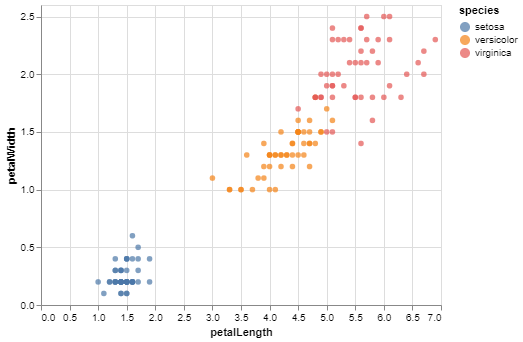

In [3]:
alt.Chart(iris).mark_circle().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

That's it! We just created a scatter plot in Altair simply by supplying the following elements:
- data: iris
- encoding: petal length (x axis), petal width (y axis) and species (color)
- mark: use filled circles as marks on the chart

## Basic SPLOM Chart

To get started with SPLOM chart, we first create a list of encodings. These are the variables we are interested in to examine their pair-wise correlation in the SPLOM chart.

In [4]:
encodings = list(iris.columns[:-1])
encodings

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']

It turns out there is a simple setup in Altair to draw a SPLOM chart. We can repeatedly create rows and columns of scatter plots in a matrix for all encodings selected by calling Altair's `repeat` method.

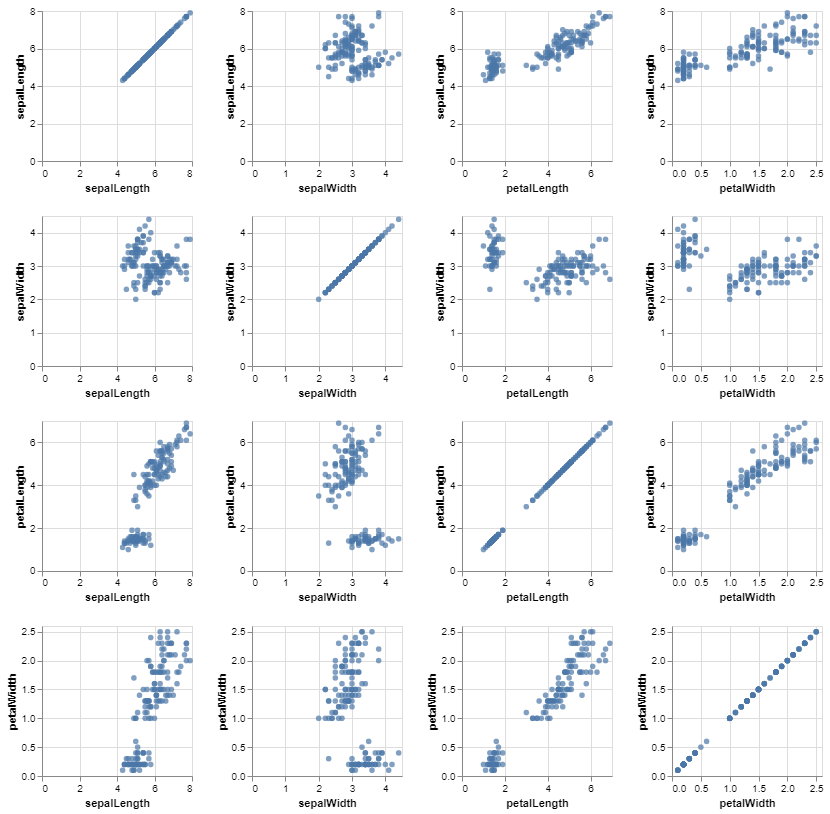

In [5]:
alt.Chart(iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties( # set width and height of the visualization
    width=150,
    height=150
).repeat( # specify what to be repeated in rows and columns
    row=encodings,
    column=encodings
)

There we have a 4 by 4 matrix of scatter plots. Each row consists of one variable and each column consists of one variable. Their pair-wise correlations are represented by the scatter plots.

In [6]:
%load_ext watermark

In [7]:
print('Dependencies: \n')
%watermark -v -p altair

Dependencies: 

CPython 3.7.5
IPython 7.9.0

altair 3.2.0


---
**Author**: Lin Di

Source code for this tutorial can be found in [GitHub](https://github.com/datascientistlin/MADS/tree/master/SIADS521/Assignment2) alongside a static HTML version for easy readability.

---

**This notebook demonstrates:**

---
**Rule 3: Use cell divisions to make steps clear.**
Each code cell is dedicated to accomplish the task of creating one visualization. They are kept short to avoid messiness in reading. Each code is also preceded with a markdown cell to describe the visualization to be implemented. Table of content is enabled in this notebook for easy access of different segments of the document.

**Rule 5: Record dependencies.**
At the end of the document, Python and Altair library version is specified for others to re-produce the same visualizations

**Rule 9: Design your notebooks to be read, run, and explored.**
The notebook is uploaded to GitHub for others to access. In addtion, a static HTML version of the notebook is created for additional support of readability

---